In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("mymoviedb.csv", lineterminator="\n")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [10]:
#General stats check

df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [11]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [100]:
df['Release_Date']= pd.to_datetime(df["Release_Date"],errors='coerce',dayfirst=True)

print(df["Release_Date"].dtypes)

datetime64[ns]


Exploration Summary
###### • we have a dataframe consisting of 9827 rows and 9 columns. 
###### • our dataset looks a bit tidy with no NaNs nor duplicated values. 
###### • Release Date column needs to be casted into date time and to extract only the 
###### • Overview, Original_Languege and Poster-Url wouldn't be so useful during analys 
###### • there is noticable outliers in Popularity column 
###### • Vote_Average bettter be categorised for proper analysis. 
###### • Genre column has comma saperated values and white spaces that needs to be cleared

In [14]:
df['Release_Date']=df['Release_Date'].dt.year

In [15]:
df['Release_Date']=df['Release_Date'].fillna(0)

In [16]:
df['Release_Date']=df['Release_Date'].astype('int64')

In [17]:
cols=['Overview','Original_Language','Poster_Url\r']

In [18]:
df.drop(cols,axis=1,inplace=True)

In [19]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [20]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War"


#### Creating categories in Vote Average column : popular, Average, Below Average, Not popular

In [22]:
# def categorize_col(df,col,labels):
#     edges=[ df[col].describe()['min'],
#             df[col].describe()['25%'],
#             df[col].describe()['50%'],
#             df[col].describe()['75%'],
#             df[col].describe()['max']]
#     df[col]=pd.cut(df[col],edges,labels=labels, duplicates='drop')
#     return df

def categorize_col(df, col, labels):
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in DataFrame")
    
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)
    
    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.5),
        df[col].quantile(0.75),
        df[col].max()
    ]
    
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

In [23]:
labels= ['not popular','below_avg','average','popular']

In [24]:
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

# Ensure there are no NaNs in 'Vote_Average' before categorizing
df['Vote_Average'].fillna(df['Vote_Average'].median())

# Use pd.qcut to create quantile-based bins
df['Vote_Average'] = pd.qcut(df['Vote_Average'], q=len(labels), labels=labels, duplicates='drop')


In [25]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [26]:
df.value_counts('Vote_Average')

Vote_Average
not popular    2567
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [29]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


### We would split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [31]:
df['Genre']=df['Genre'].str.split(', ')

df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


###### Casting column into categoreis

In [33]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [34]:
df.nunique()

Release_Date     102
Title           9512
Popularity      8159
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

#### Data Visualiztion

In [36]:
sns.set_style('whitegrid')

##### What is the most frequent genre movies released on Netflix?

In [38]:
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

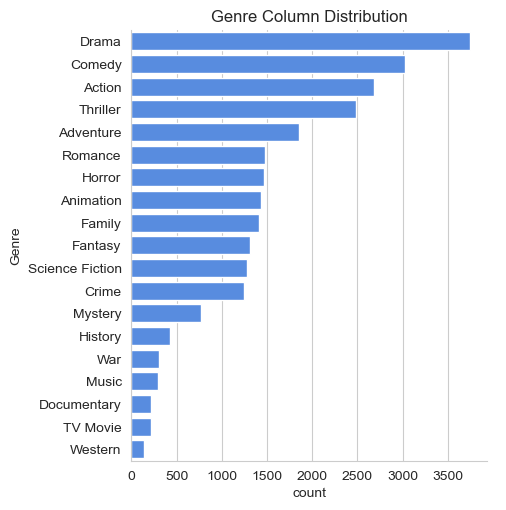

In [39]:
sns.catplot(y='Genre',data=df,kind='count', order=df['Genre'].value_counts().index,color='#4287f5')

plt.title('Genre Column Distribution')
plt.show()

##### Which movie has highest votes in vote average column

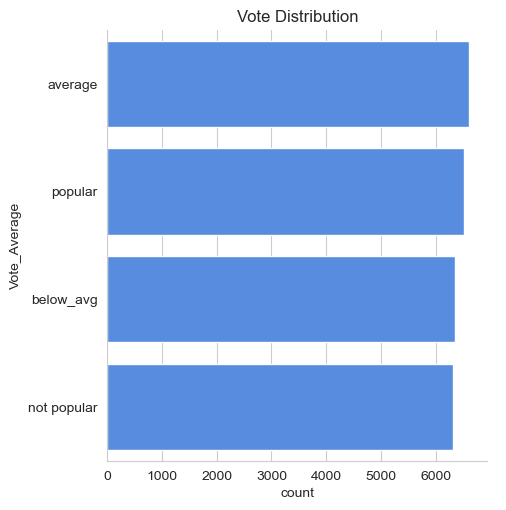

In [41]:
sns.catplot(y='Vote_Average', data=df, kind='count', order=df['Vote_Average'].value_counts().index, color='#4287f5')
plt.title('Vote Distribution')
plt.show()

##### What movie got the highest popularity  and what's its genre?

In [43]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [45]:
df[df['Popularity']== df['Popularity'].max()]   #Finding the most popular movie

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


##### What movie got the lowest popularity and what's its genre?

In [47]:
df[df['Popularity'] == df['Popularity'].min()]   #Finding the least popular movie

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25786,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25788,2021,The United States vs. Billie Holiday,13.354,152,average,History
25789,1984,Threads,13.354,186,popular,War
25790,1984,Threads,13.354,186,popular,Drama
25791,1984,Threads,13.354,186,popular,Science Fiction


##### Which year has the most filmed movies?

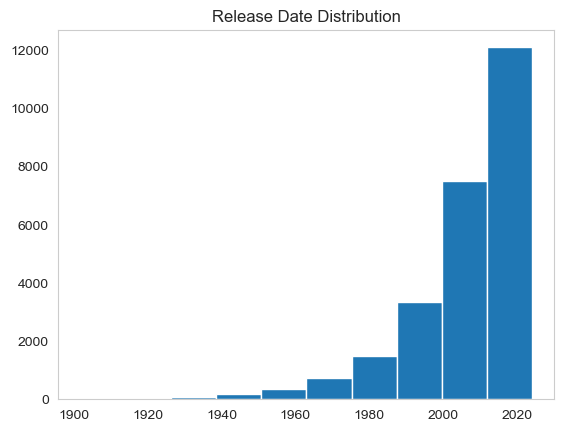

In [49]:
df['Release_Date'].hist(grid=False)
plt.title('Release Date Distribution')
plt.show()

Conculsion: 
Q1: What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.
Q2: What genres has highest votes ?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.
Q3: What movie got the highest popularity ? what's its genre ?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction .
Q3: What movie got the lowest popularity ? what's its genre ?
The united states, thread' has the highest lowest rate in our dataset
and it has genres of music , drama , 'war', 'sci-fi' and history`.
Q4: Which year has the most filmmed movies?
year 2020 has the highest filmming rate in our dataset

